<a href="https://www.kaggle.com/code/sagu13cs/census-data-dt-and-rf-implementation?scriptVersionId=205828879" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Predict the Income class using Decision Tree and Random Forest. Improve accuracy by implementing different variations of the same model.

In [51]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/adult-census-income/adult.csv


In [52]:
census_data = pd.read_csv('/kaggle/input/adult-census-income/adult.csv')
census_data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [53]:
census_data.shape

(32561, 15)

In [54]:
census_data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [55]:
census_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [56]:
census_data.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [58]:
census_data = census_data[census_data['workclass'].str.contains("\?") == False]
census_data = census_data[census_data['occupation'].str.contains("\?") == False]
census_data = census_data[census_data['native.country'].str.contains("\?") == False]
census_data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


In [59]:
print(len(census_data))

30162


In [60]:
census_data = pd.get_dummies(census_data, drop_first=True)
census_data.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia,income_>50K
1,82,132870,9,0,4356,18,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
3,54,140359,4,0,3900,40,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
4,41,264663,10,0,3900,40,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
5,34,216864,9,0,3770,45,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
6,38,150601,6,0,3770,40,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False


In [61]:
X = census_data.iloc[:,:-1]
y = census_data.iloc[:,-1]

In [62]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.2, random_state=24)

### Decision Tree Implementation

### Implementation One - with no pruning - 81% accuracy - overfitting issue

In [63]:
dt_clf = DecisionTreeClassifier(random_state=24)
dt_clf.fit(X_train,Y_train)

DecisionTreeClassifier(random_state=24)

In [64]:
test_pred = dt_clf.predict(X_test)

In [65]:
print(classification_report(test_pred, Y_test))

              precision    recall  f1-score   support

       False       0.87      0.88      0.87      4516
        True       0.63      0.62      0.62      1517

    accuracy                           0.81      6033
   macro avg       0.75      0.75      0.75      6033
weighted avg       0.81      0.81      0.81      6033



### Implementation Two - with pruning ccp_alpha=0.0001 - 85% accuracy

In [66]:
dt_clf = DecisionTreeClassifier(random_state=24, ccp_alpha=0.0001)
dt_clf.fit(X_train,Y_train)
test_pred = dt_clf.predict(X_test)
print(classification_report(test_pred, Y_test))

              precision    recall  f1-score   support

       False       0.93      0.88      0.90      4774
        True       0.62      0.74      0.67      1259

    accuracy                           0.85      6033
   macro avg       0.77      0.81      0.79      6033
weighted avg       0.86      0.85      0.85      6033



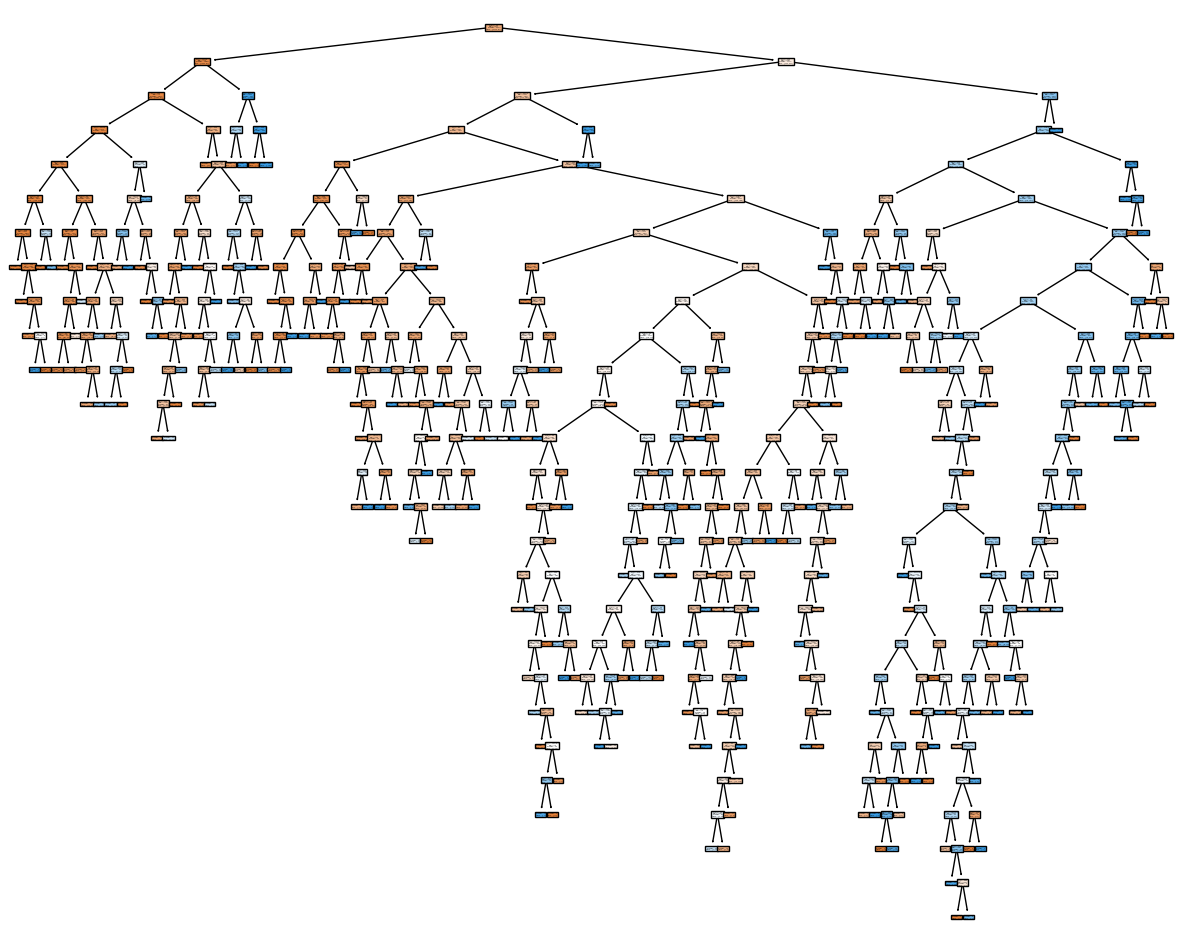

In [67]:
plt.figure(figsize=(15,12))
plot_tree(dt_clf, filled=True)
plt.show()

### Implementation Three - with pruning ccp_alpha=0.01 - 84% accuracy

In [68]:
dt_clf = DecisionTreeClassifier(random_state=24, ccp_alpha=0.01)
dt_clf.fit(X_train,Y_train)
test_pred = dt_clf.predict(X_test)
print(classification_report(test_pred, Y_test))

              precision    recall  f1-score   support

       False       0.95      0.85      0.90      5070
        True       0.50      0.78      0.61       963

    accuracy                           0.84      6033
   macro avg       0.73      0.82      0.76      6033
weighted avg       0.88      0.84      0.85      6033



### Random Forest Implementation

### Implementation One - with no pruning - 85% accuracy 

In [69]:
rf_clf = RandomForestClassifier(random_state=24)
rf_clf.fit(X_train,Y_train)

RandomForestClassifier(random_state=24)

In [70]:
test_pred = rf_clf.predict(X_test)

In [71]:
print(classification_report(test_pred, Y_test))

              precision    recall  f1-score   support

       False       0.93      0.88      0.90      4771
        True       0.62      0.73      0.67      1262

    accuracy                           0.85      6033
   macro avg       0.77      0.81      0.79      6033
weighted avg       0.86      0.85      0.85      6033



### Implementation Two - with n_estimators - 85% accuracy 

In [72]:
rf_clf = RandomForestClassifier(random_state=24, n_estimators =80)
rf_clf.fit(X_train,Y_train)
test_pred = rf_clf.predict(X_test)
print(classification_report(test_pred, Y_test))

              precision    recall  f1-score   support

       False       0.93      0.88      0.90      4786
        True       0.61      0.74      0.67      1247

    accuracy                           0.85      6033
   macro avg       0.77      0.81      0.79      6033
weighted avg       0.86      0.85      0.85      6033



### Implementation Three - with pruning ccp_alpha=0.0001 - 86% accuracy

In [73]:
rf_clf = RandomForestClassifier(random_state=24, ccp_alpha=0.0001)
rf_clf.fit(X_train,Y_train)
test_pred = rf_clf.predict(X_test)
print(classification_report(test_pred, Y_test))

              precision    recall  f1-score   support

       False       0.95      0.88      0.91      4882
        True       0.60      0.78      0.68      1151

    accuracy                           0.86      6033
   macro avg       0.77      0.83      0.79      6033
weighted avg       0.88      0.86      0.87      6033

